# 1. Load Dataset

In [1]:
import pandas as pd

# laod empt dataframe
df = pd.DataFrame()

try:
    # Read dataset saved in directory
    df = pd.read_csv("OttawaON.csv", on_bad_lines='skip')
except FileNotFoundError:
    print("No dataset with that name!")

df.head(5)

,Id,MlsNumber,PublicRemarks,Individual,PostalCode,HistoricalDataIsCleared,ProvinceName,RelativeDetailsURL,StatusId,PhotoChangeDateUTC,...,AlternateURL.VideoLink,HasNewImageUpdate,AlternateURL.PhotoLink,OpenHouseInsertDateUTC,ListingTimeZone,ListingBoundary,ListingGMT,Building.SizeExterior,Property.Price,Property.PriceUnformattedValue
0,26536455,1378295,"Welcome to 66 Cobourg Street, located in the r...","[{'IndividualID': 2057519, 'Name': 'Kevin Cosg...",K1N8G8,False,Ontario,/real-estate/26536455/66-cobourg-street-ottawa...,1,2024-02-21 8:11:48 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26537184,1378320,"Welcome to 70 Cobourg Street, located in the r...","[{'IndividualID': 2057519, 'Name': 'Kevin Cosg...",K1N8G8,False,Ontario,/real-estate/26537184/70-cobourg-street-ottawa...,1,2024-02-21 10:11:24 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26457670,13656864,See listing broker(s) (40114534),"[{'IndividualID': 1957812, 'Name': 'Epaphrodit...",J8P6P9,False,Quebec,/real-estate/26457670/94-rue-berthiaume-1-gati...,1,2024-01-29 8:10:31 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26471997,1375982,"Bright and spacious Basement unit, 1 bedroom, ...","[{'IndividualID': 1966317, 'Name': 'Carlos Zar...",K2B5R6,False,Ontario,/real-estate/26471997/846b-alpine-avenue-unit1...,1,2024-02-04 8:41:27 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26465236,1375620,LOOKING FOR GREAT TENANTS AS OF MAY 1. Rent t...,"[{'IndividualID': 1594252, 'Name': 'Johnny Hun...",K1K1W9,False,Ontario,/real-estate/26465236/340-queen-mary-street-un...,1,2024-01-31 7:11:49 PM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. Preprocessing

## 2.1 Contact

In [2]:
df.describe()

,Id,StatusId,Distance,InsertedDateUTC,UploadedBy,Building.BathroomTotal,Building.StoriesTotal,Property.Address.Longitude,Property.Address.Latitude,Property.ParkingSpaceTotal,Property.TypeId,Property.LeaseRentUnformattedValue,Property.PriceUnformattedValue
count,9.900000e+01,99.0,0.0,9.900000e+01,99.000000,99.000000,85.000000,99.000000,99.000000,92.000000,99.0,99.000000,1.0
mean,2.649079e+07,1.0,NaN,6.384277e+17,81.909091,1.323232,2.200000,-75.700938,45.396001,1.010870,300.0,1890.444444,349900.0
std,9.142464e+04,0.0,NaN,2.715233e+13,19.649527,0.682556,2.856905,0.147479,0.084264,1.124107,0.0,257.962710,NaN
min,2.606314e+07,1.0,NaN,6.383040e+17,5.000000,1.000000,1.000000,-76.183032,45.089831,0.000000,300.0,1200.000000,349900.0
25%,2.642782e+07,1.0,NaN,6.384121e+17,76.000000,1.000000,1.000000,-75.747025,45.386064,0.000000,300.0,1750.000000,349900.0
50%,2.652974e+07,1.0,NaN,6.384404e+17,76.000000,1.000000,1.000000,-75.695508,45.419689,1.000000,300.0,1870.000000,349900.0
75%,2.655747e+07,1.0,NaN,6.384467e+17,79.000000,1.000000,2.000000,-75.657409,45.438316,1.000000,300.0,2075.000000,349900.0
max,2.658404e+07,1.0,NaN,6.384526e+17,109.000000,3.000000,16.000000,-75.252593,45.521526,6.000000,300.0,2300.000000,349900.0


## 2.2 Uncessessary/NULL Contact

In [3]:
# drop uncessessary/empty features
r_df = df.drop(['Id',
                'MlsNumber',
                'PublicRemarks',
                'Individual',
                'PostalCode',
                'TimeOnRealtor',
                'HistoricalDataIsCleared',
                'RelativeDetailsURL',
                'StatusId',
                'PhotoChangeDateUTC',
                'Distance',
                'RelativeURLEn',
                'RelativeURLFr',
                'Media',
                'Tags',
                'UploadedBy',
                'Property.Address.AddressText',
                'Property.Address.PermitShowAddress',
                'Property.Photo',
                'Property.Parking',
                'Land.SizeTotal',
                'Land.SizeFrontage',
                'Property.FarmType',
                'AlternateURL.DetailsLink',
                'Property.TypeId',
                'Property.OwnershipType',
                'Property.OwnershipTypeGroupIds',
                'Property.AmmenitiesNearBy',
                'Building.Ammenities',
                'Property.Type', # maybe
                'Property.ZoningType',
                'Land.AccessType',
                'Land.LandscapeFeatures',
                'Building.SizeInterior',
                'PriceChangeDateUTC',
                'Property.ParkingType',
                'Building.BathroomTotal',
                'HasNewImageUpdate',
                'Building.SizeExterior',
                'Property.Price',
                'Property.PriceUnformattedValue',
                'AlternateURL.PhotoLink',
                'OpenHouseInsertDateUTC',
                'ListingTimeZone',
                'ListingBoundary',
                'ListingGMT',
                'Property.LeaseRent',
                'AlternateURL.VideoLink']
               , axis=1)

#drop rows without our LeaseRent target
r_df.dropna(subset=['Property.LeaseRentUnformattedValue'], inplace=True)

r_df.dtypes

ProvinceName                           object
InsertedDateUTC                         int64
Building.Bedrooms                      object
Building.StoriesTotal                 float64
Building.Type                          object
Property.Address.Longitude            float64
Property.Address.Latitude             float64
Property.ParkingSpaceTotal            float64
Property.LeaseRentUnformattedValue      int64
dtype: object

## 2.3 Column Contact Evaluation

In [4]:
# how many empty cells in total
r_df.isnull().sum().max()

14

### 2.3.2 Numerical Contact

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

Standardizing numerical features is a preprocessing step that involves transforming the values of the numerical features in your dataset so that they have a mean of 0 and a standard deviation of 1. This process is also known as z-score normalization or standardization.

The standardization formula for a feature $ X $ is given by:

$$
X_{\text{standardized}} = \frac{{X - \text{mean}(X)}}{{\text{std}(X)}}
$$

Here:
- $ X $ is an individual data point in the numerical feature.
- $ mean(X) $ is the mean (average) value of the feature across all data points.
- $ std(X) $ is the standard deviation of the feature across all data points. In other words, it provides a way to understand how much individual data points differ from the mean of the set they are apart of.

Where:

The formula for calculating the standard deviation (σ) is as follows:

$$
\sigma = \sqrt{\frac{\sum{(X_i - \bar{X})^2}}{N}}
$$

As:
- $ \sigma $ is the standard deviation.
- $ X_i $ is each individual data point. 
- $ \bar{X} $ is the mean of the data points.
- $ N $ is the total number of data points.
- $ \sum $ denotes the sum over all data points.

In [6]:
r_df.columns = [col.replace('.', '') for col in r_df.columns]
r_df

,ProvinceName,InsertedDateUTC,BuildingBedrooms,BuildingStoriesTotal,BuildingType,PropertyAddressLongitude,PropertyAddressLatitude,PropertyParkingSpaceTotal,PropertyLeaseRentUnformattedValue
0,Ontario,638441430910900000,1 + 0,1.0,House,-75.679828,45.434023,0.0,1700
1,Ontario,638441502846930000,1 + 0,1.0,House,-75.679828,45.434023,0.0,1700
2,Quebec,638421553184730000,2,1.0,House,-75.595954,45.500238,2.0,1750
3,Ontario,638424294909070000,0 + 1,1.0,House,-75.788561,45.360867,0.0,1750
4,Ontario,638423251098900000,0 + 2,1.0,House,-75.651295,45.425107,1.0,1800
...,...,...,...,...,...,...,...,...,...
94,Ontario,638404217858130000,1,NaN,Apartment,-75.688857,45.429451,NaN,1900
95,Ontario,638442510802800000,0 + 2,1.0,Apartment,-75.753395,45.342181,2.0,1900
96,Ontario,638446687017300000,1 + 0,1.0,Apartment,-75.745355,45.391618,0.0,1900
97,Ontario,638439486847470000,1 + 0,1.0,Apartment,-75.700708,45.417341,0.0,1900


In [7]:
# Convert 'InsertedDateUTC' to datetime format

# 'InsertedDateUTC' is in ticks
ticks_per_second = 1e7  # 1 tick = 100 nanoseconds, 1 second = 1e7 ticks
epoch_ticks = 621355968000000000  # Ticks from 0001-01-01 to 1970-01-01

# Convert 'InsertedDateUTC' to datetime format
r_df['InsertedDateUTC'] = pd.to_datetime((df['InsertedDateUTC'] - epoch_ticks) / ticks_per_second, unit='s', utc=True, errors='coerce')

# Convert to Canada (Eastern Time)
r_df['InsertedDateUTC'] = r_df['InsertedDateUTC'].dt.tz_convert('America/Toronto')


r_df.head(5)

,ProvinceName,InsertedDateUTC,BuildingBedrooms,BuildingStoriesTotal,BuildingType,PropertyAddressLongitude,PropertyAddressLatitude,PropertyParkingSpaceTotal,PropertyLeaseRentUnformattedValue
0,Ontario,2024-02-21 15:11:31.089999914-05:00,1 + 0,1.0,House,-75.679828,45.434023,0.0,1700
1,Ontario,2024-02-21 17:11:24.693000078-05:00,1 + 0,1.0,House,-75.679828,45.434023,0.0,1700
2,Quebec,2024-01-29 15:01:58.473000050-05:00,2,1.0,House,-75.595954,45.500238,2.0,1750
3,Ontario,2024-02-01 19:11:30.907000065-05:00,0 + 1,1.0,House,-75.788561,45.360867,0.0,1750
4,Ontario,2024-01-31 14:11:49.890000105-05:00,0 + 2,1.0,House,-75.651295,45.425107,1.0,1800


In [8]:
# For BuildingStoriesTotal        

r_df['BuildingStoriesTotal'] = r_df['BuildingStoriesTotal'].where(pd.notna(r_df['BuildingStoriesTotal']), 1)
r_df['BuildingStoriesTotal']

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
94    1.0
95    1.0
96    1.0
97    1.0
98    1.0
Name: BuildingStoriesTotal, Length: 99, dtype: float64

In [9]:
r_df['PropertyLeaseRentUnformattedValue'].astype(int)

0     1700
1     1700
2     1750
3     1750
4     1800
      ... 
94    1900
95    1900
96    1900
97    1900
98    1900
Name: PropertyLeaseRentUnformattedValue, Length: 99, dtype: int32

In [10]:
# No need For Property.Address.Longitude & Property.Address.Latitude

In [11]:
# No need For Property.TypeId 

In [12]:
# Number of bedrooms
r_df['BuildingBedrooms'] = df['Building.Bedrooms'].where(pd.notna(df['Building.Bedrooms']), 0)

r_df['BuildingBedrooms'] = r_df['BuildingBedrooms'].apply(lambda x: float(str(x).split(' + ')[0]) + float(str(x).split(' + ')[1]) if '+' in str(x) else float(x))

r_df['BuildingBedrooms']

0     1.0
1     1.0
2     2.0
3     1.0
4     2.0
     ... 
94    1.0
95    2.0
96    1.0
97    1.0
98    2.0
Name: BuildingBedrooms, Length: 99, dtype: float64

In [13]:
# Number of stories

r_df['BuildingStoriesTotal'] = df['Building.StoriesTotal'].where(pd.notna(df['Building.StoriesTotal']), 1)
r_df['BuildingStoriesTotal'] 

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
94    1.0
95    1.0
96    1.0
97    1.0
98    1.0
Name: BuildingStoriesTotal, Length: 99, dtype: float64

### 2.3.1 Categorical Contact

In [14]:
# For:
r_df.select_dtypes(include=['object']).columns

Index(['ProvinceName', 'BuildingType'], dtype='object')

In [15]:
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

One-Hot Encoding creates additional columns in the dataset, where each column represents a unique category from the original categorical variable. Each row is then represented by binary values indicating the presence or absence of a particular category.

Here's a simple example to illustrate:

Column in orignal dataframe:     

| Color |
|-------|
| Red   |
| Blue  |
| Green |
| Red   |
| Green |

After One-Hot Enconding

| Color_Red | Color_Blue | Color_Green |
|-----------|------------|-------------|
| 1         | 0          | 0           |
| 0         | 1          | 0           |
| 0         | 0          | 1           |
| 1         | 0          | 0           |
| 0         | 0          | 1           |






In [16]:
# For Building.Type

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
r_df['BuildingType'] = le.fit_transform(r_df['BuildingType'])
r_df['BuildingType']

0     1
1     1
2     1
3     1
4     1
     ..
94    0
95    0
96    0
97    0
98    0
Name: BuildingType, Length: 99, dtype: int32

In [17]:
# For Building.Ammenities
r_df['hasLaundry'] = df['Building.Ammenities']
r_df['hasLaundry'] = le.fit_transform(r_df['hasLaundry'])
r_df['hasLaundry']
# No need

0     4
1     4
2     7
3     2
4     2
     ..
94    6
95    2
96    2
97    3
98    2
Name: hasLaundry, Length: 99, dtype: int32

In [18]:
# For Property.ZoningType
df['Property.AmmenitiesNearBy'] = df['Property.AmmenitiesNearBy'].where(pd.notna(df['Property.AmmenitiesNearBy']), '')


r_df['PublicTransit'] = df['Property.AmmenitiesNearBy'].str.contains('Public Transit').astype(int)
r_df['RecreationNearby'] = df['Property.AmmenitiesNearBy'].str.contains('Recreation Nearby').astype(int)
r_df['Shopping'] = df['Property.AmmenitiesNearBy'].str.contains('Shopping').astype(int)
r_df['Highway'] = df['Property.AmmenitiesNearBy'].str.contains('Highway').astype(int)
r_df['Park'] = df['Property.AmmenitiesNearBy'].str.contains('Park').astype(int)
r_df['Schools'] = df['Property.AmmenitiesNearBy'].str.contains('Schools').astype(int)
r_df['CEGEP'] = df['Property.AmmenitiesNearBy'].str.contains('CEGEP').astype(int)
r_df['Hospital'] = df['Property.AmmenitiesNearBy'].str.contains('Hospital').astype(int)
r_df['University'] = df['Property.AmmenitiesNearBy'].str.contains('University').astype(int)

In [19]:
r_df.columns

Index(['ProvinceName', 'InsertedDateUTC', 'BuildingBedrooms',
       'BuildingStoriesTotal', 'BuildingType', 'PropertyAddressLongitude',
       'PropertyAddressLatitude', 'PropertyParkingSpaceTotal',
       'PropertyLeaseRentUnformattedValue', 'hasLaundry', 'PublicTransit',
       'RecreationNearby', 'Shopping', 'Highway', 'Park', 'Schools', 'CEGEP',
       'Hospital', 'University'],
      dtype='object')

In [20]:
r_df.head(1)

,ProvinceName,InsertedDateUTC,BuildingBedrooms,BuildingStoriesTotal,BuildingType,PropertyAddressLongitude,PropertyAddressLatitude,PropertyParkingSpaceTotal,PropertyLeaseRentUnformattedValue,hasLaundry,PublicTransit,RecreationNearby,Shopping,Highway,Park,Schools,CEGEP,Hospital,University
0,Ontario,2024-02-21 15:11:31.089999914-05:00,1.0,1.0,1,-75.679828,45.434023,0.0,1700,4,1,1,1,0,0,0,0,0,0


In [21]:
r_df['PropertyParkingType'] = df['Property.ParkingType'].where(pd.notna(df['Property.ParkingType']),0)
r_df['PropertyParkingType'] = pd.notna(df['Property.ParkingType'])
r_df['PropertyParkingType'] = r_df['PropertyParkingType'].astype(int)
r_df['PropertyParkingType']

0     0
1     0
2     1
3     1
4     1
     ..
94    1
95    1
96    0
97    0
98    1
Name: PropertyParkingType, Length: 99, dtype: int32

In [22]:
r_df['ProvinceName'] = le.fit_transform(r_df['ProvinceName'])
r_df['ProvinceName']

0     0
1     0
2     1
3     0
4     0
     ..
94    0
95    0
96    0
97    0
98    0
Name: ProvinceName, Length: 99, dtype: int32

# Evaluation

In [23]:
from sklearn.compose import ColumnTransformer

# Bundle preprocessing for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, r_df['ProvinceName'])
    ])

In [24]:
r_df['ProvinceName']

0     0
1     0
2     1
3     0
4     0
     ..
94    0
95    0
96    0
97    0
98    0
Name: ProvinceName, Length: 99, dtype: int32

# Feature Engineering

In [25]:
r_df['Year'] = r_df['InsertedDateUTC'].dt.year
r_df['Month'] = r_df['InsertedDateUTC'].dt.month
r_df['Day'] = r_df['InsertedDateUTC'].dt.day
r_df.drop('InsertedDateUTC', axis = 1, inplace=True)
r_df.dtypes

ProvinceName                           int32
BuildingBedrooms                     float64
BuildingStoriesTotal                 float64
BuildingType                           int32
PropertyAddressLongitude             float64
PropertyAddressLatitude              float64
PropertyParkingSpaceTotal            float64
PropertyLeaseRentUnformattedValue      int64
hasLaundry                             int32
PublicTransit                          int32
RecreationNearby                       int32
Shopping                               int32
Highway                                int32
Park                                   int32
Schools                                int32
CEGEP                                  int32
Hospital                               int32
University                             int32
PropertyParkingType                    int32
Year                                   int32
Month                                  int32
Day                                    int32
dtype: obj

In [26]:
# transform into binary column
# r_df.rename(columns={'PropertyParkingSpaceTotal':'hasParkingSpace'}, inplace=True)

# Property.ParkingSpaceTotal != NaN => True : 1
# r_df['hasParkingSpace'] = df['Property.ParkingSpaceTotal'].where(pd.isna(df['Property.ParkingSpaceTotal']),1)

import numpy as np

r_df['PropertyParkingSpaceTotal'] = df['Property.ParkingSpaceTotal']

# Define conditions and corresponding values
conditions = [
    # # Small Pakring = 1 -->  0 < PropertyParkingSpaceTotal <= 5
    (r_df['PropertyParkingSpaceTotal'] > 0) & (r_df['PropertyParkingSpaceTotal'] <= 5),
    
    # Medium Parking = 2 --> 5 < PropertyParkingSpaceTotal <= 10
    (r_df['PropertyParkingSpaceTotal'] > 5) & (r_df['PropertyParkingSpaceTotal'] <= 10),

    # Large Parking = 3 --> PropertyParkingSpaceTotal > 10
    r_df['PropertyParkingSpaceTotal'] > 10
]

values = [1, 2, 3]

r_df['ParkingSizeType'] = np.select(conditions, values, default=0)

print(r_df[['PropertyParkingSpaceTotal','ParkingSizeType']].tail(10))

r_df.drop(['PropertyParkingSpaceTotal'], axis=1, inplace=True)

    PropertyParkingSpaceTotal  ParkingSizeType
89                        0.0                0
90                        NaN                0
91                        1.0                1
92                        0.0                0
93                        1.0                1
94                        NaN                0
95                        2.0                1
96                        0.0                0
97                        0.0                0
98                        2.0                1


In [27]:
r_df.isnull().sum().max()
# PropertyLeaseRentUnformattedValue

0

In [28]:
r_df.dtypes

ProvinceName                           int32
BuildingBedrooms                     float64
BuildingStoriesTotal                 float64
BuildingType                           int32
PropertyAddressLongitude             float64
PropertyAddressLatitude              float64
PropertyLeaseRentUnformattedValue      int64
hasLaundry                             int32
PublicTransit                          int32
RecreationNearby                       int32
Shopping                               int32
Highway                                int32
Park                                   int32
Schools                                int32
CEGEP                                  int32
Hospital                               int32
University                             int32
PropertyParkingType                    int32
Year                                   int32
Month                                  int32
Day                                    int32
ParkingSizeType                        int32
dtype: obj

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

r_df['rent'] = r_df['PropertyLeaseRentUnformattedValue']
r_df = r_df.drop(['PropertyLeaseRentUnformattedValue'],axis=1)

C:\Users\moumi\AppData\Local\Temp\ipykernel_34116\2712823430.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="BuildingBedrooms", y="rent", data=r_df, palette=colors, ax=axes[0])
C:\Users\moumi\AppData\Local\Temp\ipykernel_34116\2712823430.py:4: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x="BuildingBedrooms", y="rent", data=r_df, palette=colors, ax=axes[0])
C:\Users\moumi\AppData\Local\Temp\ipykernel_34116\2712823430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="ProvinceName", y="rent", data=r_df, palette=colors, ax=axes[1])


Text(0.5, 1.0, 'Province vs rent')

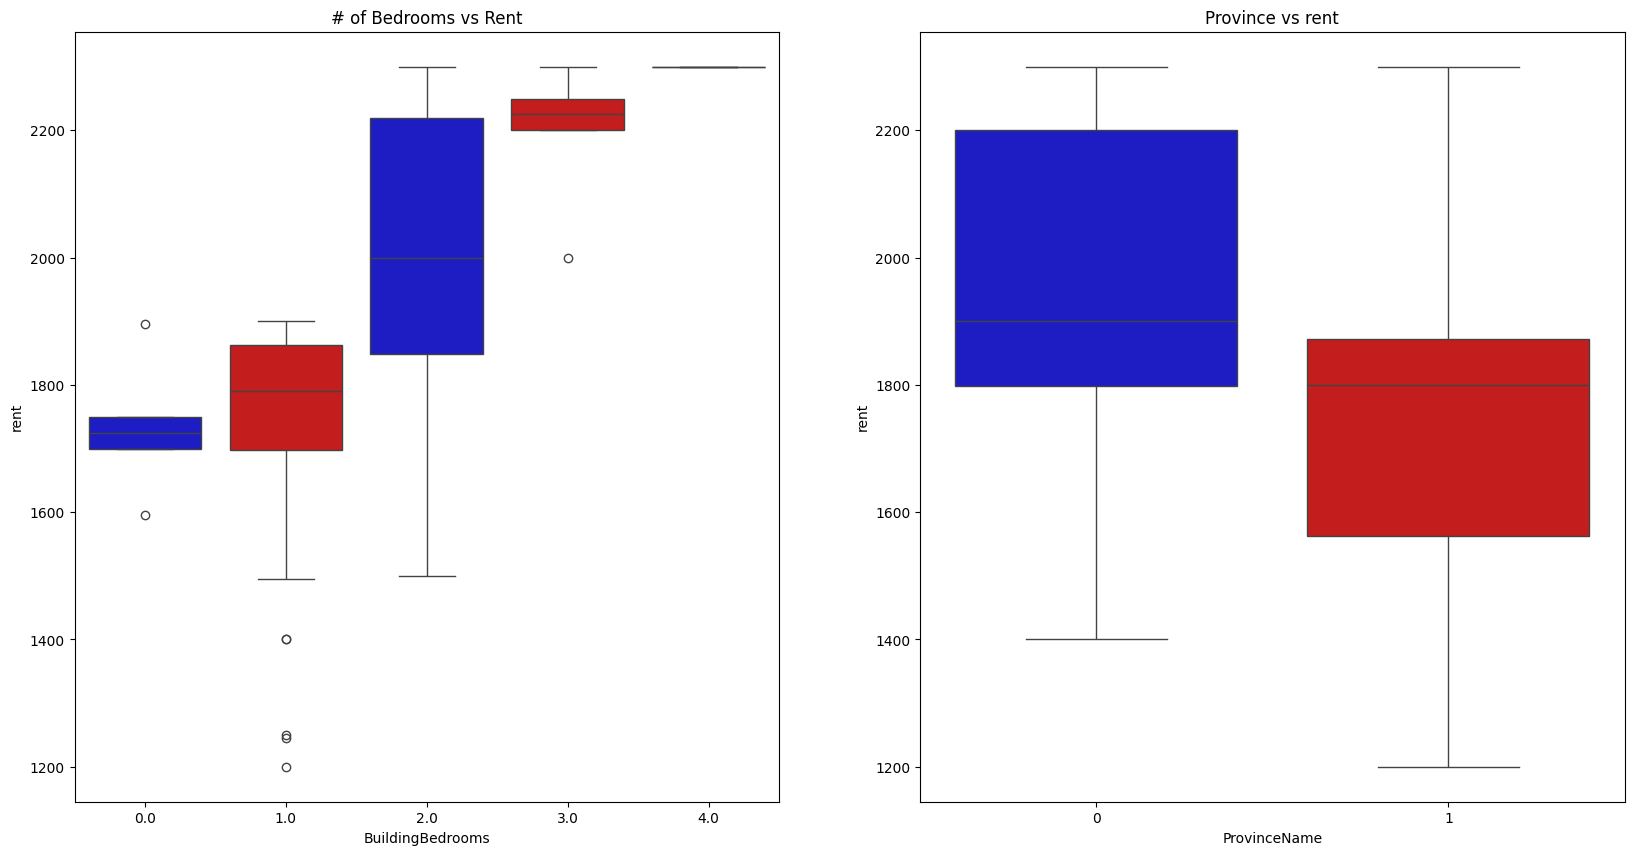

In [65]:
f, axes = plt.subplots(ncols=2, figsize=(20,10))
colors = ["#0101DF", "#DF0101"]

sns.boxplot(x="BuildingBedrooms", y="rent", data=r_df, palette=colors, ax=axes[0])
axes[0].set_title('# of Bedrooms vs Rent')

sns.boxplot(x="ProvinceName", y="rent", data=r_df, palette=colors, ax=axes[1])
axes[1].set_title('Province vs rent')

### Rental Location disctribution

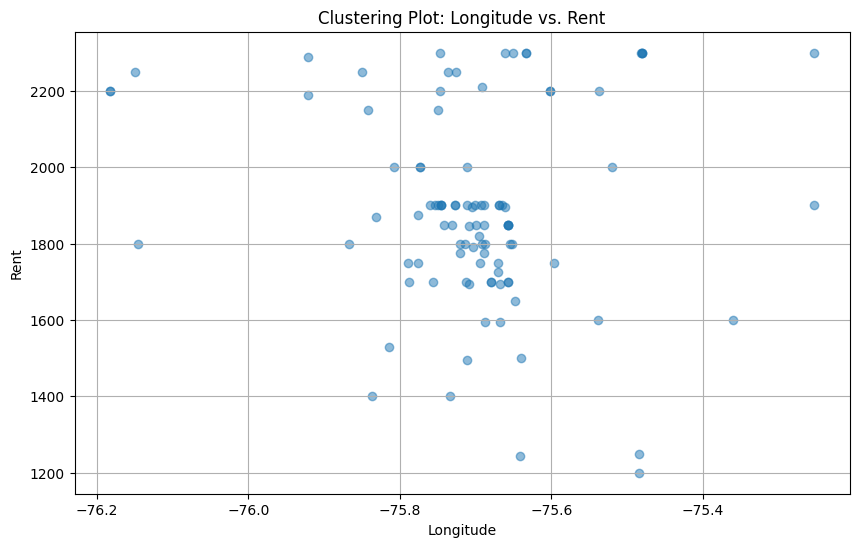

In [72]:
#clustering
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

plt.figure(figsize=(10, 6))
plt.scatter(r_df['PropertyAddressLongitude'], r_df['rent'], alpha=0.5)  # Plot longitude vs. rent
plt.title('Clustering Plot: Longitude vs. Rent')
plt.xlabel('Longitude')
plt.ylabel('Rent')
plt.grid(True)
plt.show()

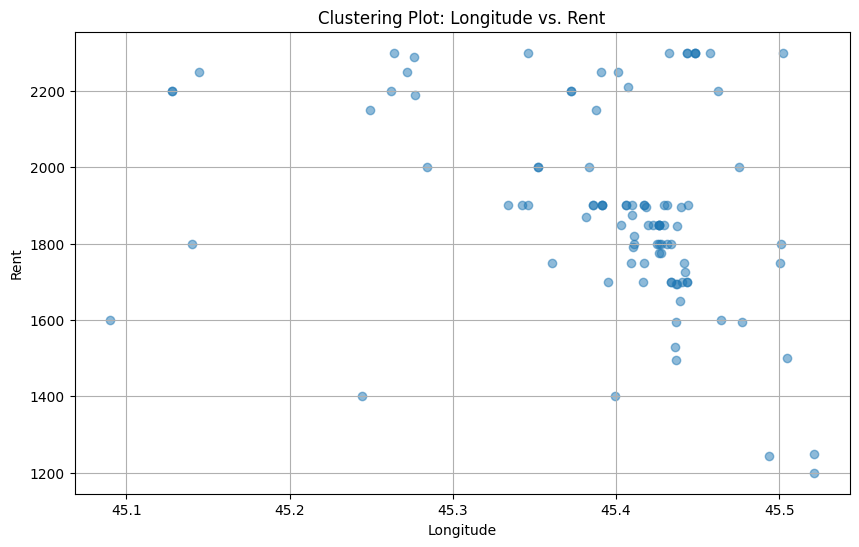

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter(r_df['PropertyAddressLatitude'], r_df['rent'], alpha=0.5)  # Plot longitude vs. rent
plt.title('Clustering Plot: Longitude vs. Rent')
plt.xlabel('Longitude')
plt.ylabel('Rent')
plt.grid(True)
plt.show()

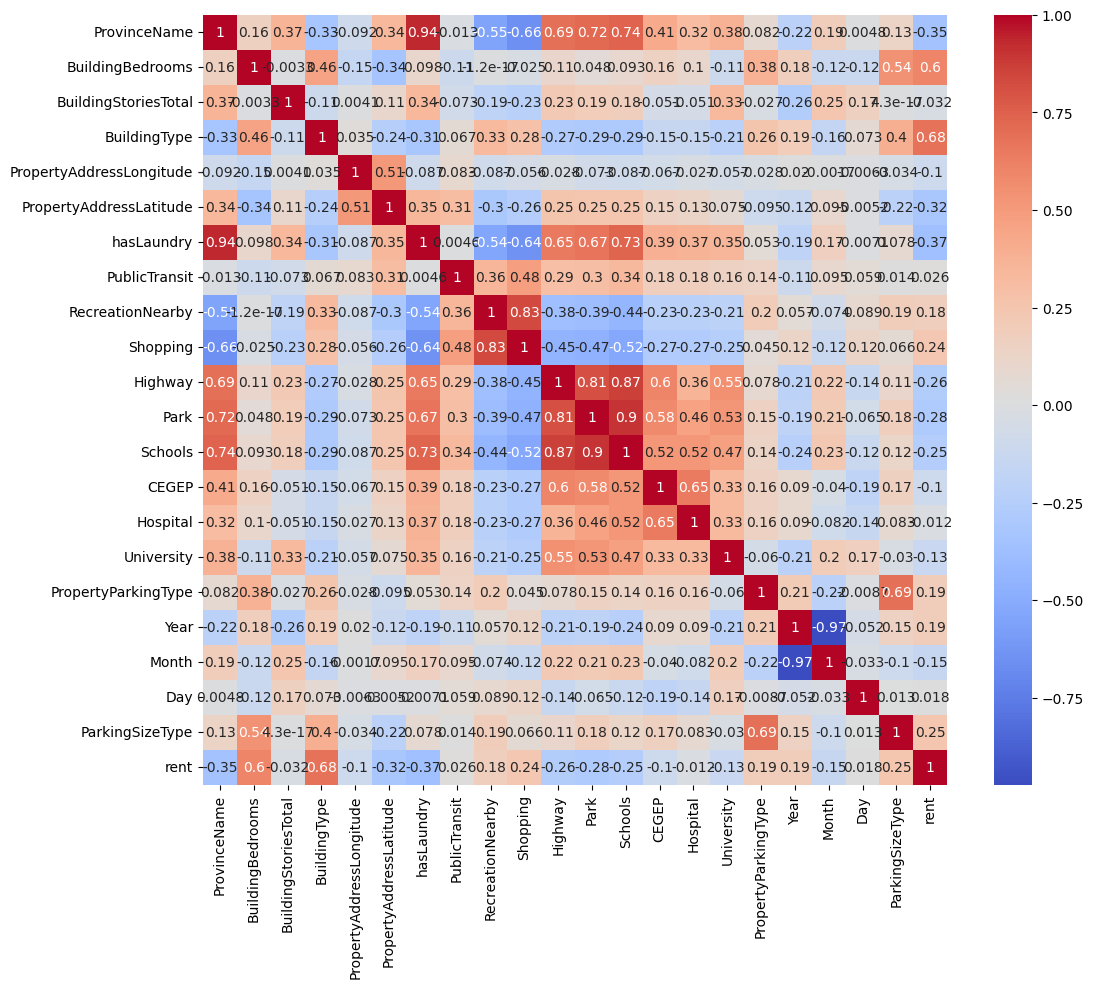

In [31]:


## Heatmap

# Calculate the correlation matrix
corr_matrix = r_df.select_dtypes('number').corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.show()
# Show the plot

In [32]:
# Step 4: Contact Splitting
from sklearn.model_selection import train_test_split

features = r_df.drop('rent', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, r_df['rent'], test_size=0.2, random_state=42)

In [33]:
test_set = pd.DataFrame(X_test, columns=features.columns)
test_set['target'] = y_test

# Save the test set to a CSV file
test_set.to_csv('test_set.csv', index=False)

In [34]:
r_df.columns

Index(['ProvinceName', 'BuildingBedrooms', 'BuildingStoriesTotal',
       'BuildingType', 'PropertyAddressLongitude', 'PropertyAddressLatitude',
       'hasLaundry', 'PublicTransit', 'RecreationNearby', 'Shopping',
       'Highway', 'Park', 'Schools', 'CEGEP', 'Hospital', 'University',
       'PropertyParkingType', 'Year', 'Month', 'Day', 'ParkingSizeType',
       'rent'],
      dtype='object')

In [35]:
r_df.dtypes

ProvinceName                  int32
BuildingBedrooms            float64
BuildingStoriesTotal        float64
BuildingType                  int32
PropertyAddressLongitude    float64
PropertyAddressLatitude     float64
hasLaundry                    int32
PublicTransit                 int32
RecreationNearby              int32
Shopping                      int32
Highway                       int32
Park                          int32
Schools                       int32
CEGEP                         int32
Hospital                      int32
University                    int32
PropertyParkingType           int32
Year                          int32
Month                         int32
Day                           int32
ParkingSizeType               int32
rent                          int64
dtype: object

In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 5: Model Training
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test)

# Evaluate using different metrics
test = model.score(X_test, y_test)
train = model.score(X_train, y_train)
r2 = r2_score(y_test, y_pred)

print(f'Test Score: {test}')
print(f'Train Score: {train}')
print(f'R-squared: {r2}')

Test Score: 0.8159944676882473
Train Score: 0.9423636221062391
R-squared: 0.8159944676882473


C:\Users\moumi\IdeaProjects\rental-app\backend\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


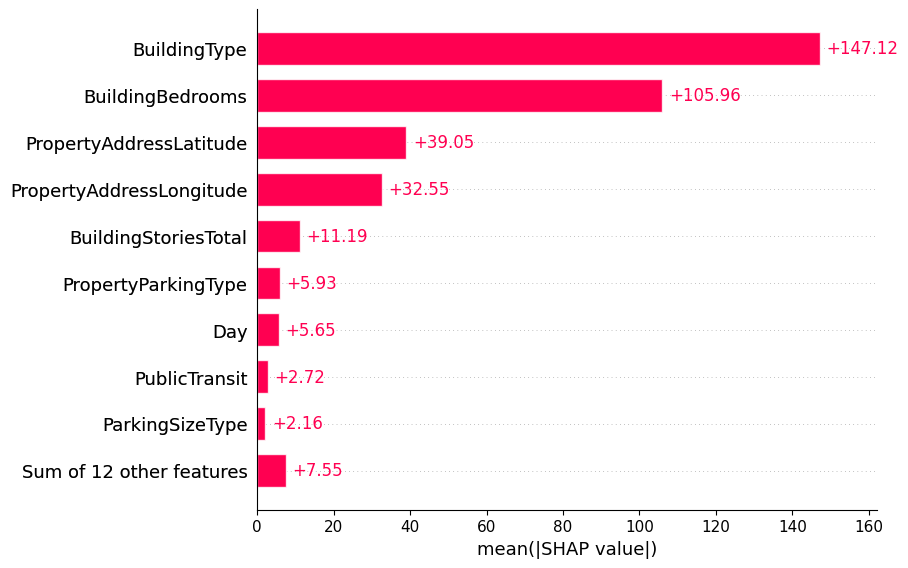

In [37]:
import shap
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values 
shap_values = explainer(X_test)
shap.plots.bar(shap_values)

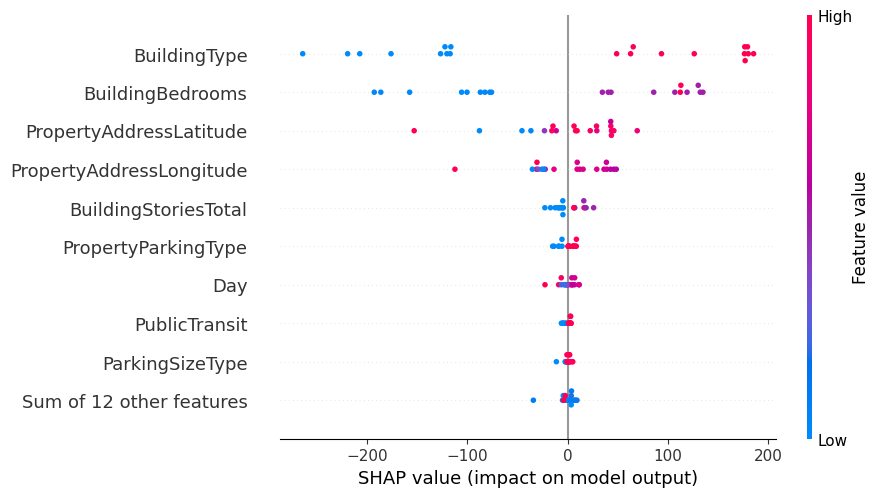

In [38]:
shap.plots.beeswarm(shap_values)

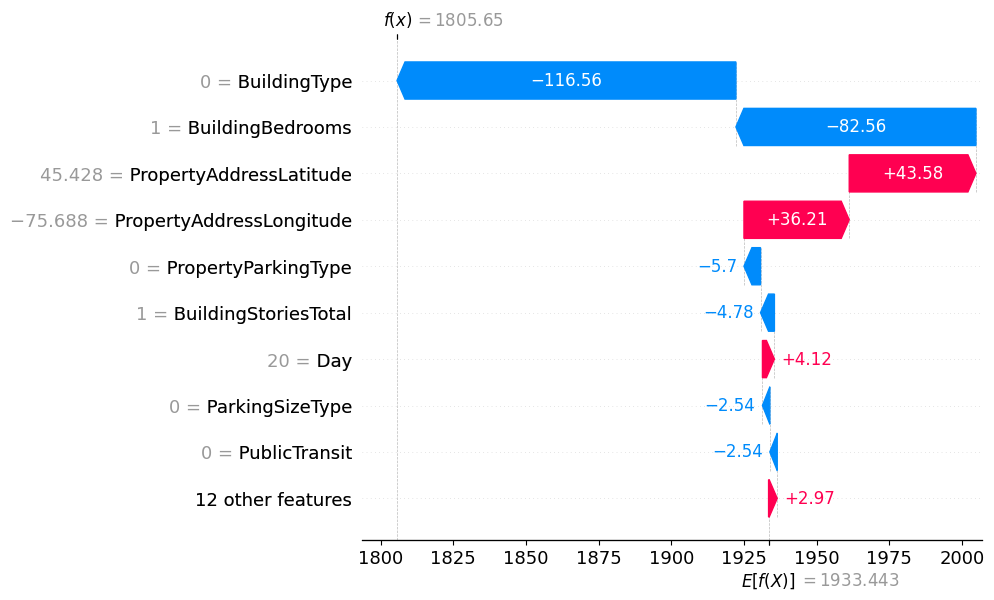

In [39]:
shap.plots.waterfall(shap_values[19])

In [40]:
X_train

,ProvinceName,BuildingBedrooms,BuildingStoriesTotal,BuildingType,PropertyAddressLongitude,PropertyAddressLatitude,hasLaundry,PublicTransit,RecreationNearby,Shopping,...,Park,Schools,CEGEP,Hospital,University,PropertyParkingType,Year,Month,Day,ParkingSizeType
49,1,1.0,1.0,0,-75.836962,45.399391,7,1,0,0,...,1,1,0,0,0,1,2023,12,27,1
70,0,1.0,1.0,0,-75.688367,45.427405,2,1,1,1,...,0,0,0,0,0,0,2024,2,21,0
68,0,1.0,1.0,0,-75.670690,45.441708,2,0,0,0,...,0,0,0,0,0,1,2024,1,11,0
15,0,2.0,2.0,1,-75.520346,45.475134,2,1,0,1,...,0,0,0,0,0,1,2024,2,26,1
39,0,2.0,1.0,1,-75.661459,45.432746,0,0,0,0,...,0,0,0,0,0,1,2024,2,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,1.0,1.0,0,-75.657493,45.443402,2,1,1,1,...,0,0,0,0,0,0,2024,2,15,0
71,0,1.0,3.0,0,-75.703503,45.410447,4,0,0,0,...,0,0,0,0,0,1,2023,12,9,0
14,0,1.0,3.0,1,-75.693160,45.409974,2,0,0,0,...,0,0,0,0,0,0,2024,3,4,0
92,0,1.0,1.0,0,-75.745126,45.391464,2,1,0,1,...,0,0,0,0,0,0,2024,2,27,0


In [41]:
features

,ProvinceName,BuildingBedrooms,BuildingStoriesTotal,BuildingType,PropertyAddressLongitude,PropertyAddressLatitude,hasLaundry,PublicTransit,RecreationNearby,Shopping,...,Park,Schools,CEGEP,Hospital,University,PropertyParkingType,Year,Month,Day,ParkingSizeType
0,0,1.0,1.0,1,-75.679828,45.434023,4,1,1,1,...,0,0,0,0,0,0,2024,2,21,0
1,0,1.0,1.0,1,-75.679828,45.434023,4,1,1,1,...,0,0,0,0,0,0,2024,2,21,0
2,1,2.0,1.0,1,-75.595954,45.500238,7,0,0,0,...,0,0,0,0,0,1,2024,1,29,1
3,0,1.0,1.0,1,-75.788561,45.360867,2,1,0,0,...,0,0,0,0,0,1,2024,2,1,0
4,0,2.0,1.0,1,-75.651295,45.425107,2,1,1,1,...,0,0,0,0,0,1,2024,1,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,1.0,1.0,0,-75.688857,45.429451,6,1,0,0,...,0,1,0,1,0,1,2024,1,9,0
95,0,2.0,1.0,0,-75.753395,45.342181,2,0,0,0,...,0,0,0,0,0,1,2024,2,22,1
96,0,1.0,1.0,0,-75.745355,45.391618,2,1,0,1,...,0,0,0,0,0,0,2024,2,27,0
97,0,1.0,1.0,0,-75.700708,45.417341,3,1,0,1,...,0,0,0,0,0,0,2024,2,19,0


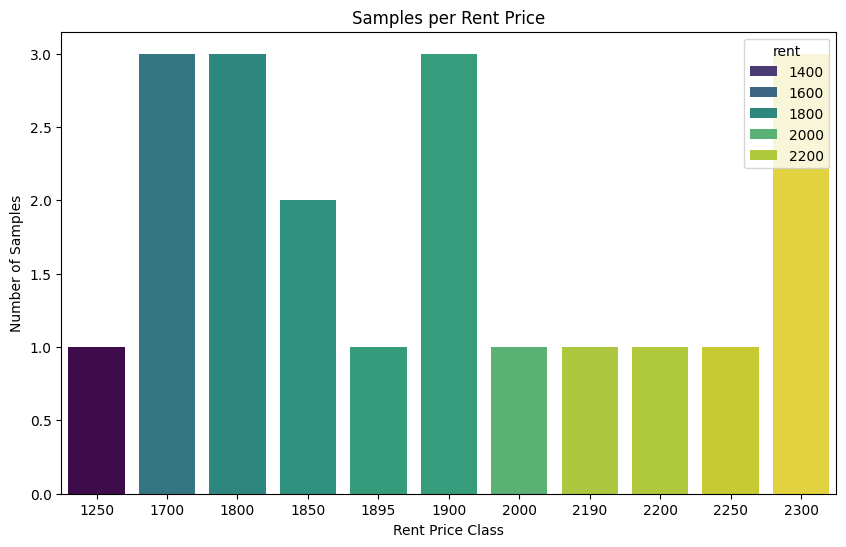

In [81]:
import matplotlib.pyplot as plt

# Count the number of samples for each rent price class
class_counts = y_test.value_counts()

# Sort the classes by rent price in ascending order
class_counts = class_counts.sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette='viridis', dodge=False)
plt.title('Samples per Rent Price')
plt.xlabel('Rent Price Class')
plt.ylabel('Number of Samples')
plt.show()

In [82]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import accuracy_score

# # Create a StratifiedKFold object with 5 splits
# stratified_kfold = StratifiedKFold(n_splits=5)

# param_grid = {
#     'n_estimators': [1, 2, 3],
#     'max_features': [1, 2, 3, 'sqrt', 'log2', None],
#     'max_depth': [1, 5, 10],
#     'criterion': ['gini', 'entropy']
# }

# CV_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=84),
#                       param_grid=param_grid,
#                       cv=stratified_kfold,
#                       scoring='accuracy',
#                       n_jobs=-1)

# CV_rfc.fit(X_train, y_train)

# # Get the best parameters
# best_params = CV_rfc.best_params_

# # Create a new model with the best parameters
# best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

# # Fit the model
# best_rf_classifier.fit(X_train, y_train)

# # Make predictions on the test set
# test_predictions = best_rf_classifier.predict(X_test)

# # Evaluate the performance
# test_accuracy = accuracy_score(y_test, test_predictions)
# train_accuracy = best_rf_classifier.score(X_train, y_train)

# print(f'Test Accuracy: {test_accuracy}')
# print(f'Train Accuracy: {train_accuracy}')

In [46]:
# serializing model
import pickle

# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [104]:
import sklearn

# Step 5: Model Training
model = sklearn.tree.DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test)

# Evaluate using different metrics
test = model.score(X_test, y_test)
train = model.score(X_train, y_train)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {test}')
print(f'Mean Squared Error: {train}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.7350865006984968
Mean Squared Error: 0.7899424891195765
R-squared: 0.7350865006984968


In [108]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVM regressor
svm_reg = SVC(kernel='linear', C=1.0)

# Fit the regressor to the training set
svm_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_reg.predict(X_test_scaled)

# Evaluate the model
test = svm_reg.score(X_test_scaled, y_test)
train = svm_reg.score(X_train_scaled, y_train)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {test}')
print(f'Mean Squared Error: {train}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.5
Mean Squared Error: 0.8860759493670886
R-squared: 0.5483713510719546
